In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

## Classificeer appels op basis van hun groenheid en rondheid
### Lineair scheidbare data

In [2]:
# Importeer de dataset

dataset = pd.read_csv('appels.csv')

# Toon de eerste rijen van de dataset
dataset.head()

,rondheid,groenheid,appel
0,9,8,1
1,10,7,1
2,2,3,0
3,1,2,0
4,5,8,1


In [3]:
# Splits op in features en targets
# features: x1 = rondheid en x2 = groenheid

features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values 
y= dataset['appel'].values

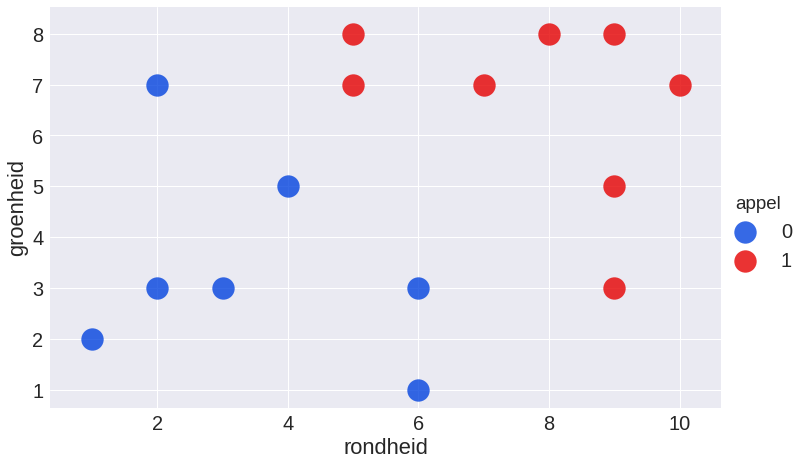

In [4]:
# Plot een scatterplot met seaborn

sns.set(font_scale = 2) # lettergrootte van de axis labels
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':500}, size=7, aspect=1.5)
#sns.plt.ylim(0, 11)
#sns.plt.xlim(0, 11)

In [5]:
# Train een logistic regression classifier

logreg = linear_model.LogisticRegression(C=1e5) # C= Inverse of regularization strength;
                                                # must be a positive float. Like in support vector machines,
                                                # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficiënten: ',logreg.coef_)
print('intercept:',logreg.intercept_)

coefficiënten:  [[ 4.28747762  4.06244327]]
intercept: [-43.94116677]


In [6]:
#voorspel de klasse van een rondheid=8 en een groenheid van 6

print(logreg.predict(np.array([8,6]).reshape(1,-1)))

print('kans op een appel/geen appel',logreg.predict_proba(np.array([8,6]).reshape(1,-1)))

#voorspel de klasse van een rondheid=4 en een groenheid van 4

print(logreg.predict(np.array([4,4]).reshape(1,-1)))
print('kans op een appel/geen appel',logreg.predict_proba(np.array([4,4]).reshape(1,-1)))

[1]
kans op een appel/geen appel [[  3.99395302e-07   9.99999601e-01]]
[0]
kans op een appel/geen appel [[  9.99973583e-01   2.64168196e-05]]


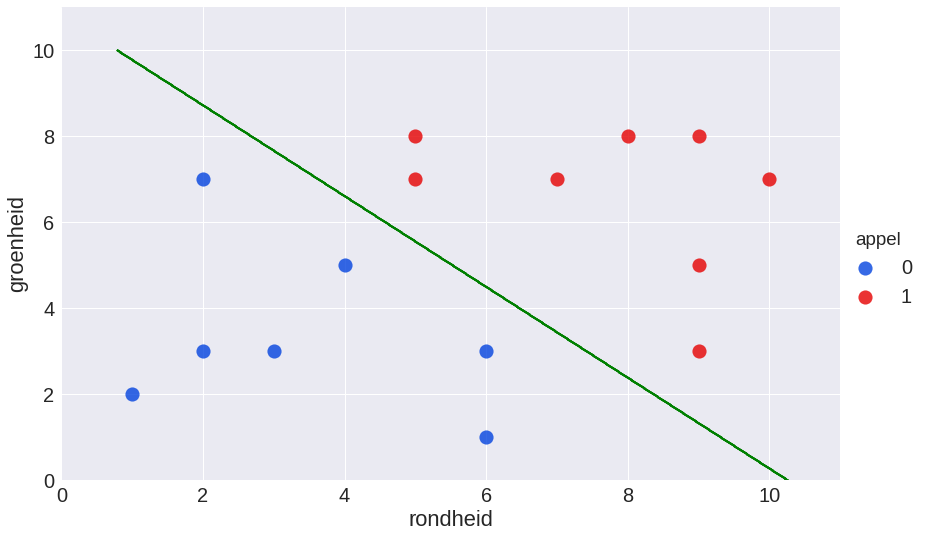

In [7]:
# Visualiseer de decision boundary

h = 0.01
rond_min = X[:,0].min()-2
rond_max = X[:,0].max()+2
groen_min = X[:,1].min()-2
groen_max = X[:,1].max()+2
xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),scatter_kws={'s':200}, size=8, aspect=1.5)
sns.plt.ylim(0, 11)
sns.plt.xlim(0, 11)
plt.contour(xx, yy, Z, colors='green')

### Niet-lineair scheidbare data

In [8]:
dataset =pd.read_csv('appels_non_linear.csv')
dataset.head()

,rondheid,groenheid,appel
0,9,8,1
1,10,7,1
2,2,3,0
3,1,2,0
4,5,8,1


In [9]:
# Opsplitsen in features en targets

features = list(dataset.columns[:dataset.columns.size-1])
X = dataset[features].values 
y= dataset['appel'].values

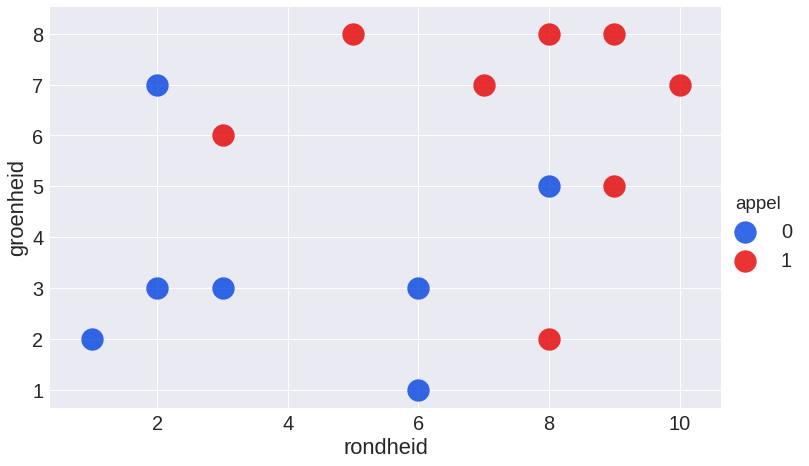

In [10]:
# Plot een scatterplot met seaborn

sns.set(font_scale = 2) # lettergrootte van de axis labels
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),
           scatter_kws={'s':500}, size=7, aspect=1.5)
#sns.plt.ylim(0, 11)
#sns.plt.xlim(0, 11)


In [11]:
# Train een logistic regression classifier

logreg = linear_model.LogisticRegression(C=1e5) # C= Inverse of regularization strength;
                                                # must be a positive float. Like in support vector machines,
                                                # smaller values specify stronger regularization.
logreg.fit(X, y)

print('coefficiënten: ',logreg.coef_)
print('intercept:',logreg.intercept_)

coefficiënten:  [[ 0.56397113  0.66817284]]
intercept: [-6.33681669]


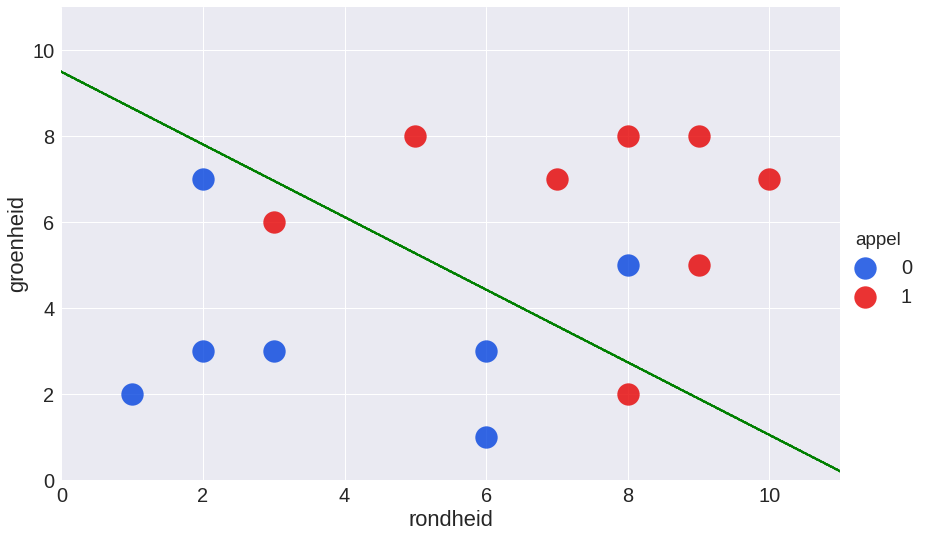

In [12]:
# Visualiseer de decision boundary

h = 0.01

rond_min = X[:,0].min()-2
rond_max = X[:,0].max()+2

groen_min = X[:,1].min()-2
groen_max = X[:,1].max()+2


xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),scatter_kws={'s':500}, size=8, aspect=1.5)
sns.plt.ylim(0, 11)
sns.plt.xlim(0, 11)

plt.contour(xx, yy, Z, colors='green')   

### Hogere orde logistic regression classifier

(357500, 10)


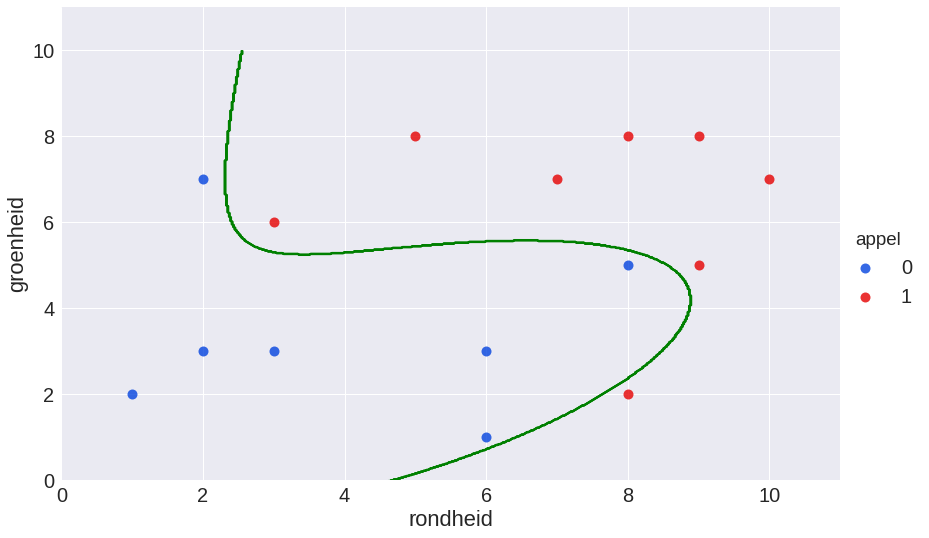

In [33]:
# Aanmaken van de hogere orde features
graad = 3

poly = PolynomialFeatures(graad)
Xp = poly.fit_transform(X)


# Train model op hogere orde features en visualiseer de decision boundary

logreg_poly = linear_model.LogisticRegression(C=1)
logreg_poly.fit(Xp, y)

h = 0.02

rond_min = X[:,0].min()-2
rond_max = X[:,0].max()+2

groen_min = X[:,1].min()-2
groen_max = X[:,1].max()+2


xx, yy = np.meshgrid(np.arange(rond_min, rond_max, h),np.arange(groen_min, groen_max, h))

X_m = np.hstack((xx.reshape(-1,1),yy.reshape(-1,1)))
 

X_mf = poly.fit_transform(X_m)
print(X_mf.shape)
Z = logreg_poly.predict(X_mf)
Z = Z.reshape(xx.shape)


sns.set(font_scale = 2)
colors = ["blue", "red", "greyish", "faded green", "dusty purple"]
sns.lmplot(x='rondheid',y='groenheid',data=dataset,fit_reg=False,hue='appel',palette =sns.xkcd_palette(colors),scatter_kws={'s':100}, size=8, aspect=1.5)
sns.plt.ylim(0, 11)
sns.plt.xlim(0, 11)

plt.contour(xx, yy, Z, colors='green')   
